In [1]:
from collections import Counter
import numpy as np
import DataAug_misc as da
import IPython.display as ipd
import matplotlib.pyplot as plt
import librosa
import librosa.display
import os

In [2]:
from SoundDataGenerator import SoundDataGenerator

In [41]:
sound_datagen = SoundDataGenerator(noise_dir="sig_noise_data_3s/Noise/Noise/",)

In [42]:
sig_dir = "sig_noise_data_3s/Signal/"

In [43]:
save_to = "Augmented/"

In [77]:
data_itr = gen.flow_from_directory(directory=sig_dir, batch_size=1500)

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

Found 2385 clips belonging to 5 classes.


In [78]:
batch_X, batch_y = data_itr.next()

In [79]:
batch_X.shape

(1500, 13, 517, 1)

In [80]:
batch_y.shape

(1500, 5)

In [81]:
batch_y

array([[0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [82]:
print(np.unique(test_batch_y, axis=0, return_counts=True))

(array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32), array([343, 289, 374, 233, 261], dtype=int64))


In [7]:
def plot_mfcc(mfccs):
    mfcc=np.array(mfccs)
    mfcc=np.squeeze(mfccs)
    print(mfcc.shape)
    plt.figure(figsize=(10,5))
    librosa.display.specshow(mfcc,x_axis='log',sr=sr)
    plt.show()

(13, 517)


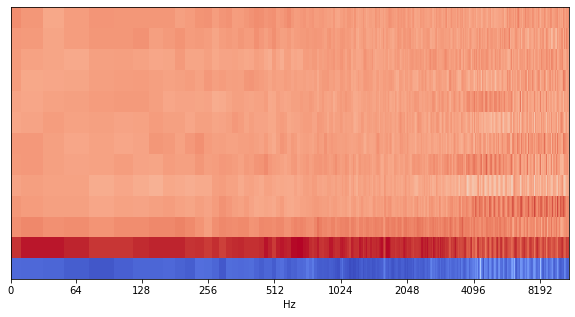

In [86]:
plot_mfcc(batch_X[0])

In [ ]:
np.savez_compressed('Train.npz', batch_X)

In [ ]:
np.savez_compressed('Train_label.npz', batch_y)

In [4]:
Train_data =  np.load('Train.npz')
data = Train_data['arr_0']

In [5]:
data.shape

(1500, 13, 517, 1)

In [58]:
wav,sr=librosa.load('sig_noise_data_3s/Signal/Cyanistes caeruleus/Cyanistes caeruleus_1_seg_1.wav')
wav2,sr2=librosa.load('sig_noise_data_3s/Noise/Noise/Cyanistes caeruleus_10_seg_0.wav')

In [39]:
print(sr)

22050


In [40]:
def plot_mfcc(mfccs):
    mfcc=np.array(mfccs)
    mfcc=np.squeeze(mfccs)
    print(mfcc.shape)
    plt.figure(figsize=(10,5))
    librosa.display.specshow(mfcc,x_axis='log',sr=sr)
    plt.show()

(13, 517)


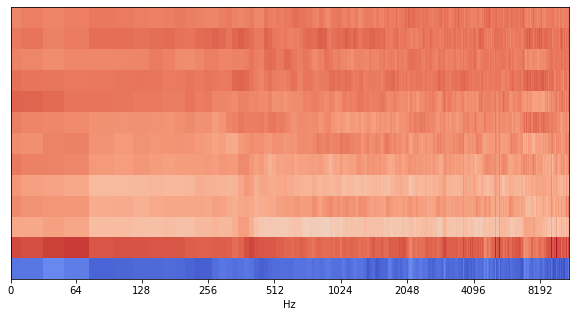

In [41]:
wav_mfcc = da.wav_to_mfcc(wav)
plot_mfcc(wav_mfcc)

In [42]:
spec = librosa.stft(wav)
S_db = librosa.amplitude_to_db(np.abs(spec), ref=np.max)

In [43]:
def plot_spec(S_db):
    plt.figure(figsize=(10, 5), dpi=100, frameon=False)
    librosa.display.specshow(S_db)

    plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)

    plt.margins(0,0)
    plt.gca().xaxis.set_major_locator(plt.NullLocator())
    plt.gca().yaxis.set_major_locator(plt.NullLocator())

    plt.axis('off')

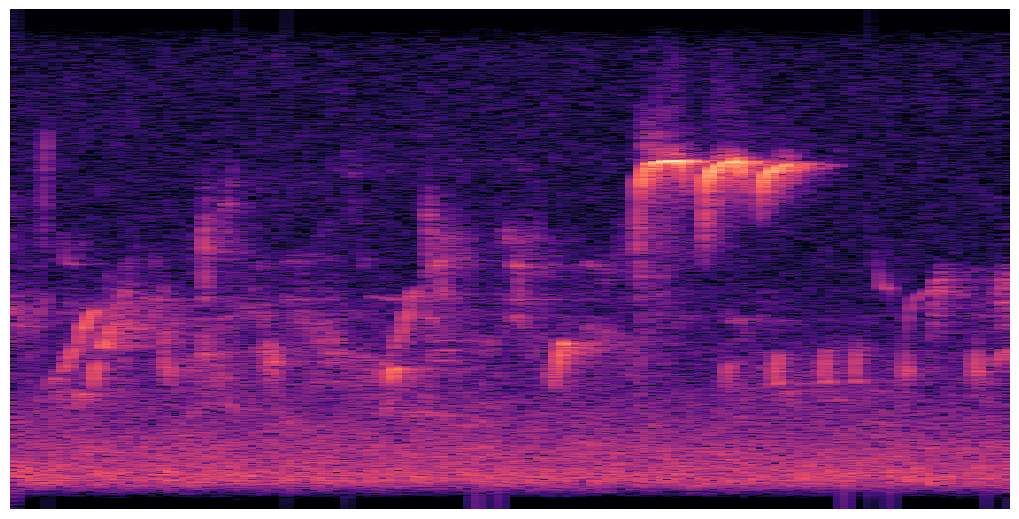

In [44]:
plot_spec(S_db)

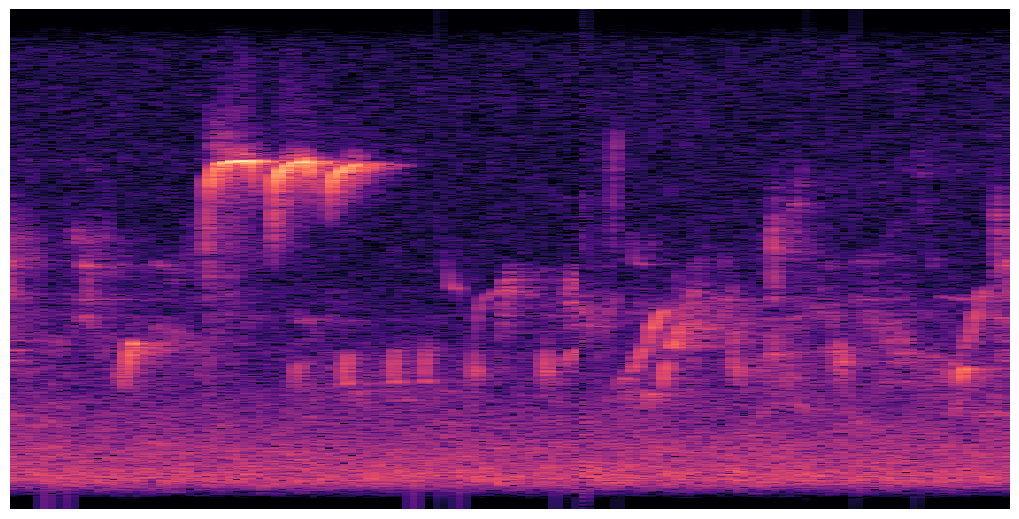

In [52]:
S_db_shifted = da.time_shift_spectrogram(S_db)
plot_spec(S_db_shifted)

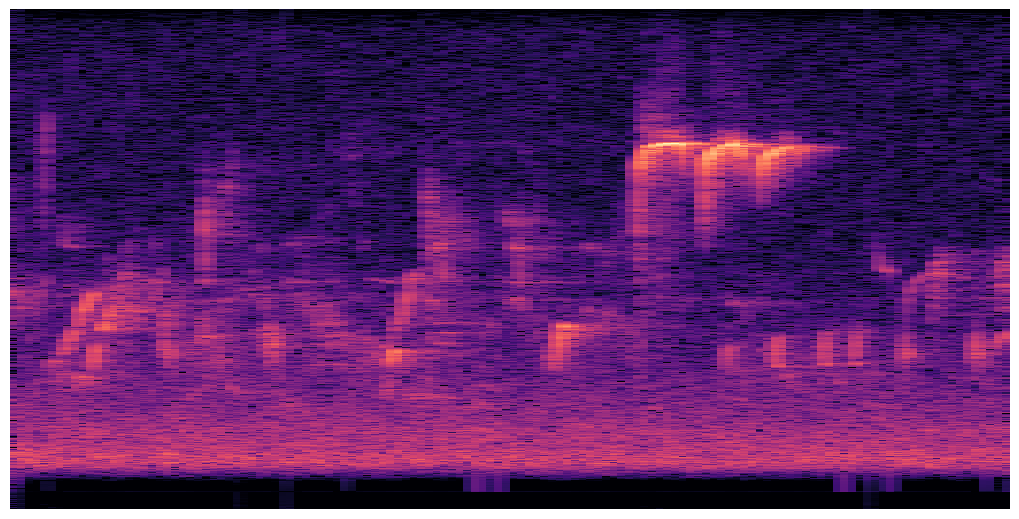

In [54]:
S_db_pshifted = da.pitch_shift_spectrogram(S_db)
plot_spec(S_db_pshifted)

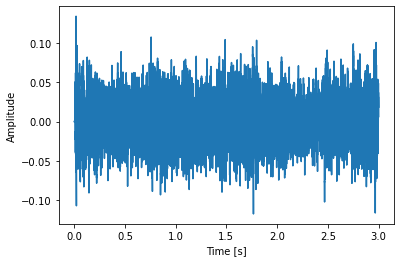

In [59]:
duration = len(wav2)/sr

time = np.arange(0,duration,1/sr) #time vector

plt.plot(time,wav2)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.show()